## Neural Network

- 2 Layer
- Tanh Activation(1st layer)
- SoftMax Activation(Output)

In [1]:
## import Matpolt with PyQt4 Backend
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Run some setup code for this notebook.
import random
import numpy as np
import pandas as pd
from mnist import MNIST

import sys
sys.path.append('./..')
from py_model.two_layer_mlp import NeuralNetwork

%load_ext autoreload
%autoreload 2

In [3]:
def make_dataset(X, y):
    train_X = np.array([])
    train_y = np.array([], dtype=int)

    num_train = 60000
    num_test = 10000

    for i in range(int(num_train/4)):
        train_X = np.append(train_X, X)
        train_y = np.append(train_y, y)

    train_X = train_X.reshape((num_train, 2))

    test_indices = np.random.choice(num_train, num_test, replace=True)
    test_X = train_X[test_indices]
    test_y = train_y[test_indices]

    print(train_X.shape, train_y.shape)
    print(test_X.shape, test_y.shape)

    return train_X, train_y, test_X, test_y

## And
- 0, 0 : 0
- 0, 1 : 0
- 1, 0 : 0
- 1, 1 : 1

In [4]:
and_X = [[0, 0], [0, 1], [1, 0], [1, 1]]
and_y = [0, 0, 0, 1]

train_X, train_y, test_X, test_y = make_dataset(and_X, and_y)

(60000, 2) (60000,)
(10000, 2) (10000,)


In [5]:
print(train_X[:4], train_y[:4])

[[ 0.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  1.]] [0 0 0 1]


In [6]:
layer1 = {'layer': (2, 3000), 'activation': lambda x: np.tanh(x) }  # Tanh
layer2 = {'layer': (3000, 2)} 
#output layer Softmax

nn = NeuralNetwork(layer1, layer2)
nn.train(train_X, train_y, learning_rate=0.1, num_iters=1000, batch_size=128, verbose=True)

Epoch :  1  loss= 0.693185574229
Epoch :  51  loss= 0.520420098491
Epoch :  101  loss= 0.571433317817
Epoch :  151  loss= 0.386541725886
Epoch :  201  loss= 0.250362682824
Epoch :  251  loss= 0.130998575206
Epoch :  301  loss= 0.0825844622711
Epoch :  351  loss= 0.0551068743939
Epoch :  401  loss= 0.0377958477382
Epoch :  451  loss= 0.030169082992
Epoch :  501  loss= 0.0250591093162
Epoch :  551  loss= 0.0183130049743
Epoch :  601  loss= 0.0151963492744
Epoch :  651  loss= 0.0124078275297
Epoch :  701  loss= 0.010433453413
Epoch :  751  loss= 0.0102267643522
Epoch :  801  loss= 0.00825875817811
Epoch :  851  loss= 0.00871835141354
Epoch :  901  loss= 0.00644512983916
Epoch :  951  loss= 0.00629563675348


Accuracy : 100.0%


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


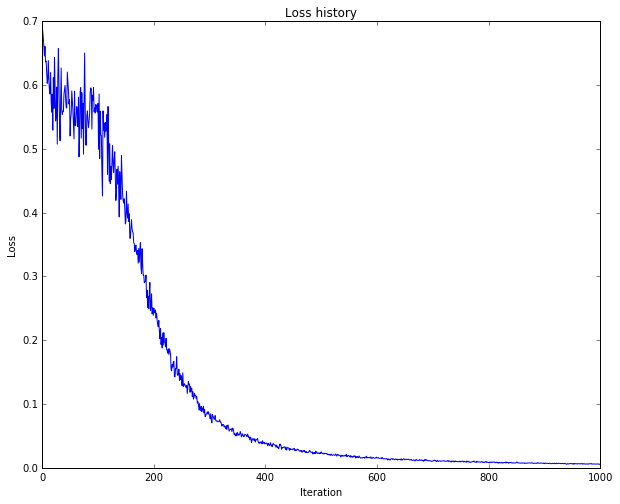

In [7]:
# Test
val_acc = (nn.predict(test_X) == test_y).mean()
print("Accuracy : " + str(val_acc*100) + "%")

# Plot Loss History
plt.plot(nn.loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

### OR
- 0, 0 : 0
- 0, 1 : 1
- 1, 0 : 1
- 1, 1 : 1

In [8]:
or_X = [[0, 0], [0, 1], [1, 0], [1, 1]]
or_y = [0, 1, 1, 1]

train_X, train_y, test_X, test_y = make_dataset(or_X, or_y)

(60000, 2) (60000,)
(10000, 2) (10000,)


In [9]:
print(train_X[:4], train_y[:4])

[[ 0.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  1.]] [0 1 1 1]


In [10]:
layer1 = {'layer': (2, 3000), 'activation': lambda x: np.tanh(x) }  # Tanh
layer2 = {'layer': (3000, 2)} 
#output layer Softmax

nn = NeuralNetwork(layer1, layer2)
nn.train(train_X, train_y, learning_rate=0.1, num_iters=1000, batch_size=128, verbose=True)

Epoch :  1  loss= 0.693636683777
Epoch :  51  loss= 0.494717573155
Epoch :  101  loss= 0.472953269832
Epoch :  151  loss= 0.26358675
Epoch :  201  loss= 0.113597054981
Epoch :  251  loss= 0.0572666821703
Epoch :  301  loss= 0.0308773325653
Epoch :  351  loss= 0.0234524101469
Epoch :  401  loss= 0.0177531075285
Epoch :  451  loss= 0.013668086763
Epoch :  501  loss= 0.0103822748132
Epoch :  551  loss= 0.00864994051973
Epoch :  601  loss= 0.0079099548787
Epoch :  651  loss= 0.00603077989403
Epoch :  701  loss= 0.00547237451288
Epoch :  751  loss= 0.00503124080543
Epoch :  801  loss= 0.00462978774699
Epoch :  851  loss= 0.0035991906068
Epoch :  901  loss= 0.00351134602057
Epoch :  951  loss= 0.00345461008848


Accuracy : 100.0%


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


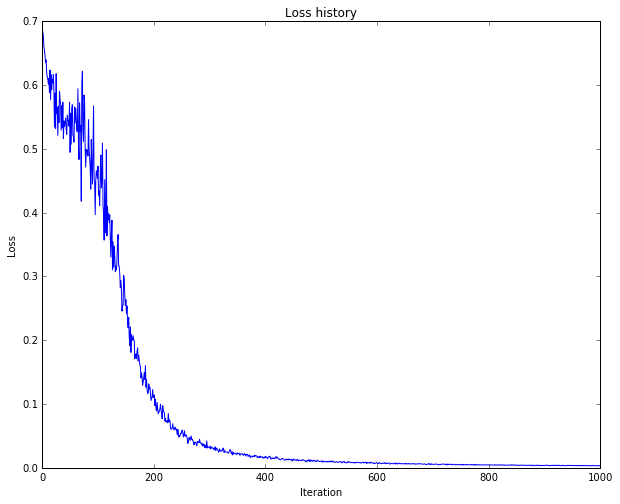

In [11]:
# Test
val_acc = (nn.predict(test_X) == test_y).mean()
print("Accuracy : " + str(val_acc*100) + "%")

# Plot Loss History
plt.plot(nn.loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### XOR
- 0, 0 = 0
- 0, 1 = 1
- 1, 0 = 1
- 1, 1 = 0

In [12]:
xor_X = [[0, 0], [0, 1], [1, 0], [1, 1]]
xor_y = [0, 1, 1, 0]

train_X, train_y, test_X, test_y = make_dataset(xor_X, xor_y)

(60000, 2) (60000,)
(10000, 2) (10000,)


In [13]:
print(train_X[:4], train_y[:4])

[[ 0.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  1.]] [0 1 1 0]


In [14]:
layer1 = {'layer': (2, 3000), 'activation': lambda x: np.tanh(x) }  # Tanh
layer2 = {'layer': (3000, 2)} 
#output layer Softmax

nn = NeuralNetwork(layer1, layer2)
nn.train(train_X, train_y, learning_rate=0.1, num_iters=1000, batch_size=128, verbose=True)

Epoch :  1  loss= 0.693132904709
Epoch :  51  loss= 0.694542120755
Epoch :  101  loss= 0.699061274496
Epoch :  151  loss= 0.692863105674
Epoch :  201  loss= 0.694930923298
Epoch :  251  loss= 0.693204540601
Epoch :  301  loss= 0.693772572135
Epoch :  351  loss= 0.693049874589
Epoch :  401  loss= 0.692885543518
Epoch :  451  loss= 0.694069720573
Epoch :  501  loss= 0.693029173359
Epoch :  551  loss= 0.693180243389
Epoch :  601  loss= 0.693655677292
Epoch :  651  loss= 0.693230221543
Epoch :  701  loss= 0.696699329262
Epoch :  751  loss= 0.693102381625
Epoch :  801  loss= 0.692253713798
Epoch :  851  loss= 0.692738663083
Epoch :  901  loss= 0.692978925402
Epoch :  951  loss= 0.692800409242


Accuracy : 49.49%


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


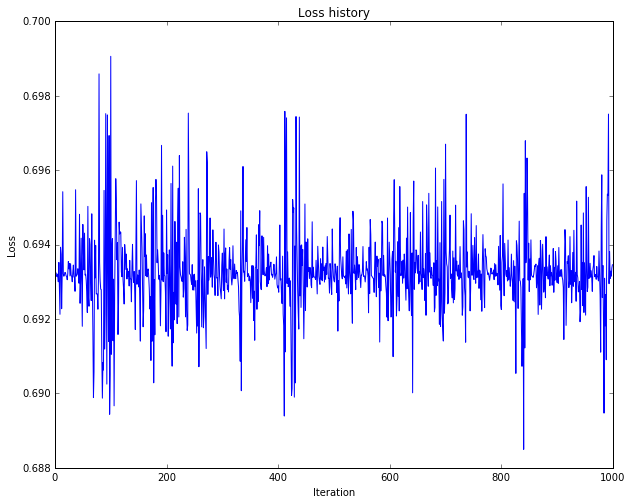

In [15]:
# Accuracy
val_acc = (nn.predict(test_X) == test_y).mean()
print("Accuracy : " + str(val_acc*100) + "%")

# Plot Loss History
plt.plot(nn.loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()